In [1]:
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm_notebook
from numba import jit
# import hdbscan
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None 

In [2]:
img_path = "/home/user/projects/agrivision/data/Agriculture-Vision/train/images/nir/1DJX4RH9N_6886-1513-7398-2025.jpg"

In [34]:
gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
gray = cv2.resize(gray, (64, 64))

In [38]:
@jit(nopython=True)
def calculate_correlations(dist_map):
    dist_map = dist_map.astype(np.float32)
    flatten_map = dist_map.flatten()
    res_arr = np.zeros((dist_map.shape[0], dist_map.shape[0], flatten_map.shape[0]))
    for i in np.arange(flatten_map.shape[0]):
        value = flatten_map[i]
        calculated_map = (dist_map - value) / (dist_map + value)
        # print(calculated_map.shape)
        res_arr[:, :, i] = calculated_map
    return res_arr

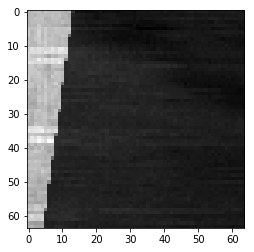

In [57]:
plt.imshow(gray, 'gray')

In [40]:
%%time
cross_correlation = calculate_correlations(gray)

CPU times: user 700 ms, sys: 52 ms, total: 752 ms
Wall time: 754 ms


In [60]:
cross_correlation.shape

(64, 64, 4096)

In [52]:
some_ = ((cross_correlation[:, :, 1600:1603] + 1) * 127).astype(np.uint8)

In [58]:
some_ = np.zeros((cross_correlation.shape[0], cross_correlation.shape[0], 3))
for i in range(3):
    some_[:, :, i] = cross_correlation[:, :, 500* i]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


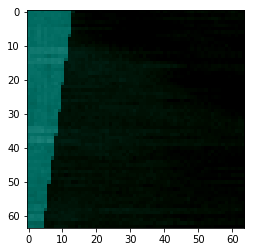

In [59]:
plt.imshow(some_)

In [ ]:
template = gray.copy()

In [ ]:
# methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#             'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# for meth in methods:
#     img = img2.copy()
#     method = eval(meth)

#     # Apply template Matching
res = cv2.matchTemplate(gray,template,cv2.TM_CCOEFF_NORMED)

In [ ]:
res.shape

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(gray, "gray")